In [1]:
!pip install opendatasets
import zipfile, os
import opendatasets as od
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
od.download(
    'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gladishafifah
Your Kaggle Key: ··········


100%|██████████| 534M/534M [00:06<00:00, 84.1MB/s]


In [3]:
base_dir = '/content/vegetable-image-dataset/Vegetable Images/train'
os.listdir(base_dir)

['Bottle_Gourd',
 'Papaya',
 'Carrot',
 'Cucumber',
 'Bitter_Gourd',
 'Pumpkin',
 'Potato',
 'Cauliflower',
 'Capsicum',
 'Cabbage',
 'Broccoli',
 'Brinjal',
 'Tomato',
 'Radish',
 'Bean']

In [4]:
#Print total images in scissors, paper, and rock files
print('Image Bottle Gourd amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bottle_Gourd')))
print('Image Papaya amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Papaya')))
print('Image Carrot amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Carrot')))
print('Image Cucumber amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cucumber')))
print('Image Bitter_Gourd amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bitter_Gourd')))
print('Image Pumpkin amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Pumpkin')))
print('Image Potato amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Potato')))
print('Image Cauliflower amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cauliflower')))
print('Image Capsicum amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Capsicum')))
print('Image Cabbage amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cabbage')))
print('Image Broccoli amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Broccoli')))
print('Image Briinjal amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Brinjal')))
print('Image Tomato amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Tomato')))
print('Image Radish amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Radish')))
print('Image Bean amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bean')))

Image Bottle Gourd amount : 1000
Image Papaya amount : 1000
Image Carrot amount : 1000
Image Cucumber amount : 1000
Image Bitter_Gourd amount : 1000
Image Pumpkin amount : 1000
Image Potato amount : 1000
Image Cauliflower amount : 1000
Image Capsicum amount : 1000
Image Cabbage amount : 1000
Image Broccoli amount : 1000
Image Briinjal amount : 1000
Image Tomato amount : 1000
Image Radish amount : 1000
Image Bean amount : 1000


In [5]:
# Image Augmentation for duplicating image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [6]:
#Create generator classifier
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset = 'validation'
)

Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
      print('\n Accuracy sudah mencapai > 93%')
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
model_layer = Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D((2,2), padding='valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), padding='valid'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), padding='valid'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.016), activity_regularizer=regularizers.l1(0.006)),
    tf.keras.layers.Dense(15, activation='softmax')
])

model_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [9]:
#Adding an optimizer
model_layer.compile(
    loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [10]:
#Train Model with DenseNet201
history = model_layer.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    verbose=1,
    callbacks = [callbacks]
)

Epoch 1/30
375/375 [==============================] - 56s 115ms/step - loss: 2.2257 - accuracy: 0.4325 - val_loss: 1.7113 - val_accuracy: 0.5717
Epoch 2/30
375/375 [==============================] - 39s 105ms/step - loss: 1.4641 - accuracy: 0.6680 - val_loss: 1.2601 - val_accuracy: 0.7400
Epoch 3/30
375/375 [==============================] - 41s 108ms/step - loss: 1.1456 - accuracy: 0.7754 - val_loss: 1.0247 - val_accuracy: 0.8123
Epoch 4/30
375/375 [==============================] - 35s 93ms/step - loss: 1.0163 - accuracy: 0.8200 - val_loss: 0.9833 - val_accuracy: 0.8173
Epoch 5/30
375/375 [==============================] - 35s 94ms/step - loss: 0.9208 - accuracy: 0.8469 - val_loss: 0.8644 - val_accuracy: 0.8710
Epoch 6/30
375/375 [==============================] - 35s 92ms/step - loss: 0.8292 - accuracy: 0.8722 - val_loss: 0.7958 - val_accuracy: 0.8833
Epoch 7/30
375/375 [==============================] - 34s 92ms/step - loss: 0.8002 - accuracy: 0.8818 - val_loss: 0.7642 - val_accura

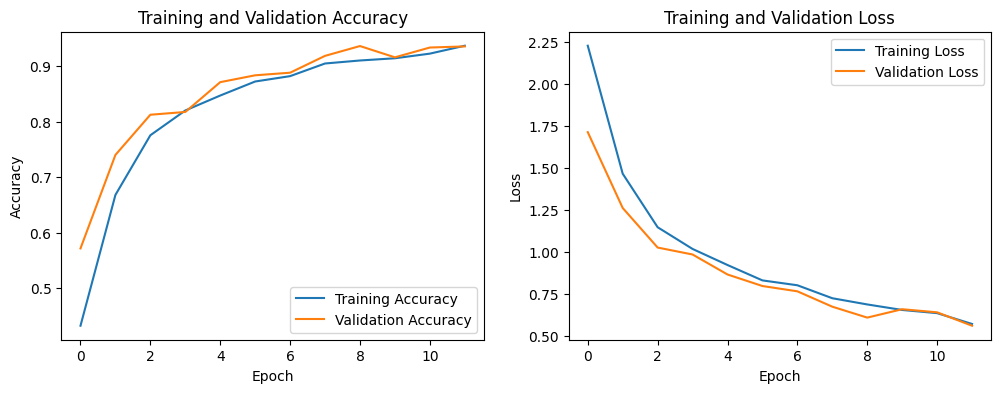

In [11]:
# Visualize accuracy and loss plot
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

plt.figure(figsize = (12, 4))
epochs = range(len(accuracy))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [12]:
train_generator.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

Saving 1537366285235.webp to 1537366285235.webp
1/1 [==============================] - 1s 509ms/step
1537366285235.webp
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
your hand shows the Tomato


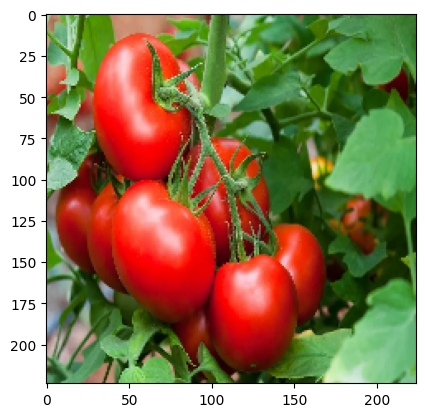

In [13]:
uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = fn
    img = load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0) # menambahkan 1 dimensi, axis menunjukkan jumlah kelas

    images = np.vstack([x])
    classes = model_layer.predict(images, batch_size=8)
    result = np.argmax(classes)
    print(fn)
    print(classes)

    if result == 0:
      print('the picture shows Bean')
    elif result == 1:
      print('the picture shows Bitter_Gourd')
    elif result == 2:
      print('the picture shows Bottle_Gourd')
    elif result == 3:
      print('the picture shows Brinjal')
    elif result == 4:
      print('the picture shows Broccoli')
    elif result == 5:
      print('the picture shows Cabbage')
    elif result == 6:
      print('the picture shows Capsicum')
    elif result == 7:
      print('the picture shows Carrot')
    elif result == 8:
      print('the picture shows Cauliflower')
    elif result == 9:
      print('the picture shows Cucumber')
    elif result == 10:
      print('the picture shows Papaya')
    elif result == 11:
      print('the picture shows Potato')
    elif result == 12:
      print('the picture shows Pumpkin')
    elif result == 13:
      print('the picture shows Radish')
    else:
      print('your hand shows the Tomato')

In [14]:
# Save model to SavedModel format
exportDir = 'saved_model/'
tf.saved_model.save(model_layer, exportDir)

# Convert model to TF-Lite format
converter    = tf.lite.TFLiteConverter.from_saved_model(exportDir)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as t:
    t.write(tflite_model)

print(f'Model TFLite berhasil disimpan di: {tflite_model}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

